In [1]:
GYRO = False
SEQUENCE_LENGTH = 4
SEQUENCE_OVERLAP = 3
BATCH_SIZE = 10
EPOCHS = 50
MODEL_NAME = f"physical_activity_(combined_sitting_standing)_epochs:{EPOCHS}_batch:{BATCH_SIZE}_gyro:{GYRO}_window:{SEQUENCE_LENGTH}_overlap:{SEQUENCE_OVERLAP}.keras"

TRAINING_SIZE = 0.8
DEV_SIZE = 0.1
TEST_SIZE = 0.1

# EDIT THE VALUES IN THE CELL ABOVE THEN PRESS RUN ALL

In [2]:
import file_tagger
import sequence_genrator
import tensorflow as tf
import numpy as np
from keras import layers, Sequential
from sklearn.model_selection import train_test_split

2023-11-06 16:27:27.545712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
DATA_DIRECTORY = "./all_respeck"
PHYSICAL_ACTIVITIES = {
    "sitting&normal_breathing",
    "standing&normal_breathing",
    "lying_down_left&normal_breathing",
    "lying_down_right&normal_breathing",
    "lying_down_back&normal_breathing",
    "lying_down_stomach&normal_breathing",
    "walking&normal_breathing",
    "ascending_stairs&normal_breathing",
    "descending_stairs&normal_breathing",
    "shuffle_walking&normal_breathing",
    "running&normal_breathing",
    "misc_movements&normal_breathing"
}

In [90]:
def getLabel(recordingType):
    return 0 if recordingType in PHYSICAL_ACTIVITIES else 1


def generateTrainingData(directory, sequenceLength, overlap):
    tagged_data = {}

    csv_dictionary = file_tagger.tag_directory(directory)

    for recordingType in csv_dictionary:
        tagged_data[recordingType] = []
        for csv_file in csv_dictionary[recordingType]:
            sequences = sequence_genrator.generate_sequences_from_file_without_gyroscope(directory + "/" + csv_file, sequenceLength, overlap)
            for sequence in sequences:
                tagged_data[recordingType].append((getLabel(recordingType), sequence))
            

    print ("there are " + str(len(tagged_data)) + " tagged sequences in the dataset")    
    return tagged_data

In [66]:
training_data_1_0 = generateTrainingData(DATA_DIRECTORY, 1, 0)

there are 44 tagged sequences in the dataset
<class 'dict'>


In [49]:
def calculate_magnitude(sequence):
    total_magnitude = 0
    # Sequence is a 2D array of shape (25, 3)
    for acceloremter_data in sequence:
        magnitude = np.sqrt(np.square(float(acceloremter_data[0])) + np.square(float(acceloremter_data[1])) + np.square(float(acceloremter_data[2])))
        total_magnitude += np.square(magnitude)
    return total_magnitude

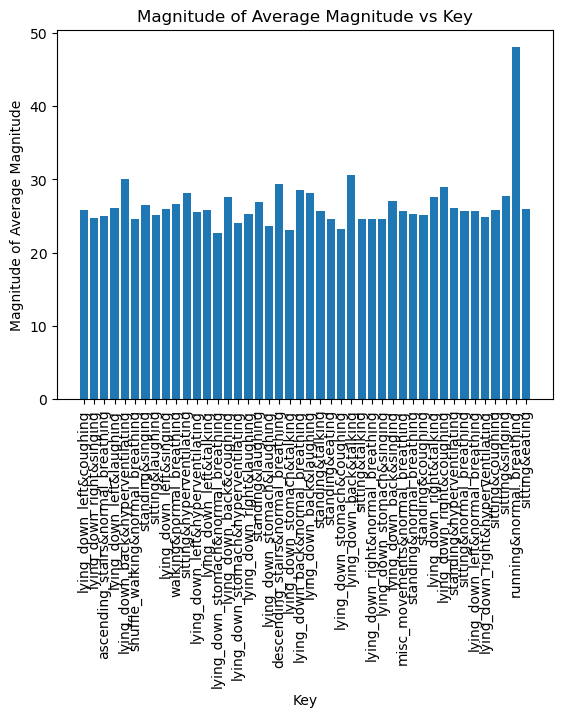

In [79]:
import matplotlib.pyplot as plt

x = []
y = []

mags = {}
count = {}

for key in training_data_1_0:
    mag = calculate_magnitude(training_data_1_0[key])
    if key in mags:
        mags[key] += mag
        count[key] += 1
    else:
        mags[key] = mag
        count[key] = 1
        
for key in mags:
    mags[key] /= count[key]
    x.append(key)
    y.append(mags[key])

plt.bar(x, y)
plt.xlabel('Key')
plt.xticks(rotation=90)
plt.ylabel('Magnitude of Average Magnitude')
plt.title('Magnitude of Average Magnitude vs Key')

plt.show()


In [81]:
def calculate_distance(point1, point2):
    # Map the points from strings to floats
    point1 = list(map(float, point1))
    point2 = list(map(float, point2))
    return np.sqrt(np.square(point1[0] - point2[0]) + np.square(point1[1] - point2[1]) + np.square(point1[2] - point2[2]))

In [91]:
all_data = generateTrainingData(DATA_DIRECTORY, 30, 0)

there are 44 tagged sequences in the dataset


In [93]:
for key in all_data:
    print(len(all_data[key]))

44
42
42
44
43
46
44
40
43
44
45
46
46
45
45
44
46
44
44
41
43
45
43
45
43
45
45
45
45
44
43
46
44
46
44
43
45
43
44
45
46
43
46
45
